In [2]:
from decode import decode_A50, decode_A50_downhill, decode_F6P, decode_tile
import matplotlib.pyplot as plt
from sync import syncTile, splitTileIntoDownhillTileTracks
from load import load_2023_12_30
from tile import Tile
from track import Track
from stitch import stitch
from signal_processing import lowpass, rmse

# load & sync using the unfiltered altitude data, to determine the best lp filter
a50_2023_12_30, a50_all_2023_12_30, f6p_2023_12_30, tile_2023_12_30_runs = load_2023_12_30(use_alt_lpf=False)

A50 Downhill Tracks
	 Track type Downhill | Date 2023-12-30 | Time 12:06:29 | Duration [s] 115 | Length [m] 977
	 Track type Downhill | Date 2023-12-30 | Time 12:18:53 | Duration [s] 114 | Length [m] 1032
	 Track type Downhill | Date 2023-12-30 | Time 12:21:47 | Duration [s] 40 | Length [m] 111
A50 All Tracks
	 Track type Hold | Date 2023-12-30 | Time 11:52:15 | Duration [s] 110 | Length [m] 36
	 Track type Walk | Date 2023-12-30 | Time 11:54:05 | Duration [s] 103 | Length [m] 56
	 Track type Hold | Date 2023-12-30 | Time 11:55:48 | Duration [s] 74 | Length [m] 22
	 Track type Walk | Date 2023-12-30 | Time 11:57:02 | Duration [s] 82 | Length [m] 53
	 Track type Lift | Date 2023-12-30 | Time 11:58:24 | Duration [s] 485 | Length [m] 862
	 Track type Downhill | Date 2023-12-30 | Time 12:06:29 | Duration [s] 115 | Length [m] 977
	 Track type Walk | Date 2023-12-30 | Time 12:08:24 | Duration [s] 92 | Length [m] 75
	 Track type Lift | Date 2023-12-30 | Time 12:09:56 | Duration [s] 410 | Leng

In [3]:
run1 = tile_2023_12_30_runs[0]
run1_a50 = a50_2023_12_30[0]
run2 = tile_2023_12_30_runs[1]
run2_a50 = a50_2023_12_30[1]

In [4]:
r1_alt_3hz = lowpass(run1.corrected_alt, 3/100, 'butter2')
r1_alt_2hz = lowpass(run1.corrected_alt, 2/100, 'butter2')
r1_alt_1hz = lowpass(run1.corrected_alt, 1/100, 'butter2')
r1_alt_05hz = lowpass(run1.corrected_alt, 0.5/100, 'butter2')
r1_alt_025hz = lowpass(run1.corrected_alt, 0.25/100, 'butter2')

r2_alt_3hz = lowpass(run2.corrected_alt, 3/100, 'butter2')
r2_alt_2hz = lowpass(run2.corrected_alt, 2/100, 'butter2')
r2_alt_1hz = lowpass(run2.corrected_alt, 1/100, 'butter2')
r2_alt_05hz = lowpass(run2.corrected_alt, 0.5/100, 'butter2')
r2_alt_025hz = lowpass(run2.corrected_alt, 0.25/100, 'butter2')

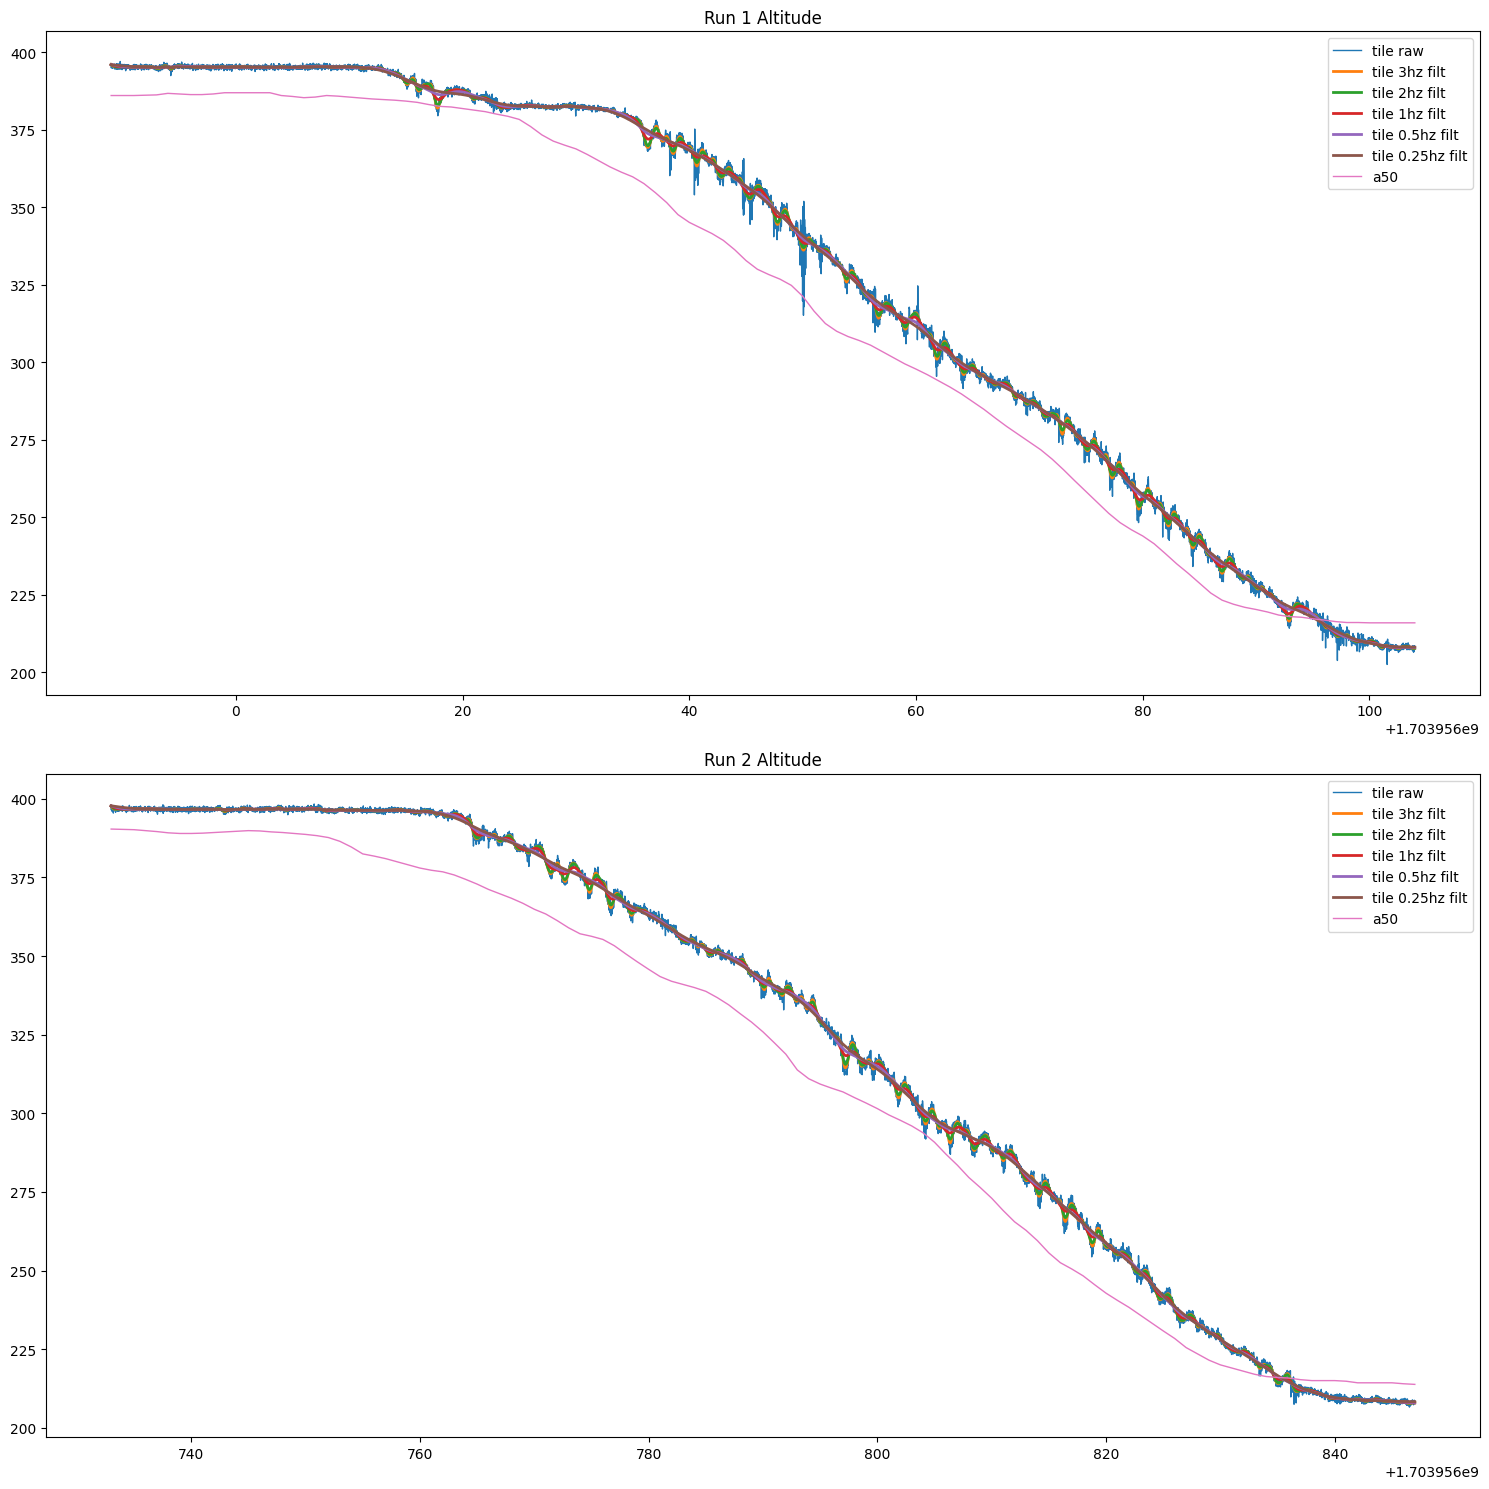

In [6]:
plt.rc('lines', linewidth=1)
_, ax = plt.subplots(2, figsize=(15, 15))

ax[0].plot(run1.time, run1.corrected_alt, label='tile raw')
ax[0].plot(run1.time, r1_alt_3hz, lw=2, label='tile 3hz filt')
ax[0].plot(run1.time, r1_alt_2hz, lw=2, label='tile 2hz filt')
ax[0].plot(run1.time, r1_alt_1hz, lw=2, label='tile 1hz filt')
ax[0].plot(run1.time, r1_alt_05hz, lw=2, label='tile 0.5hz filt')
ax[0].plot(run1.time, r1_alt_025hz, lw=2, label='tile 0.25hz filt')
ax[0].plot(run1_a50.time, run1_a50.alt, label='a50')
ax[0].set_title('Run 1 Altitude', wrap=True)
ax[0].legend()

ax[1].plot(run2.time, run2.corrected_alt, label='tile raw')
ax[1].plot(run2.time, r2_alt_3hz, lw=2, label='tile 3hz filt')
ax[1].plot(run2.time, r2_alt_2hz, lw=2, label='tile 2hz filt')
ax[1].plot(run2.time, r2_alt_1hz, lw=2, label='tile 1hz filt')
ax[1].plot(run2.time, r2_alt_05hz, lw=2, label='tile 0.5hz filt')
ax[1].plot(run2.time, r2_alt_025hz, lw=2, label='tile 0.25hz filt')
ax[1].plot(run2_a50.time, run2_a50.alt, label='a50')
ax[1].set_title('Run 2 Altitude', wrap=True)
ax[1].legend()

plt.tight_layout()
plt.show()

Lowest RMSE?

In [10]:
print("Run1 Tile to A50 RMSE")
print("3hz:\t", rmse(run1_a50.alt, r1_alt_3hz))
print("2hz:\t", rmse(run1_a50.alt, r1_alt_2hz))
print("1hz:\t", rmse(run1_a50.alt, r1_alt_1hz))
print("0.5hz:\t", rmse(run1_a50.alt, r1_alt_05hz))
print("0.25hz:\t", rmse(run1_a50.alt, r1_alt_025hz))

print("\nRun2 Tile to A50 RMSE")
print("3hz:\t", rmse(run2_a50.alt, r2_alt_3hz))
print("2hz:\t", rmse(run2_a50.alt, r2_alt_2hz))
print("1hz:\t", rmse(run2_a50.alt, r2_alt_1hz))
print("0.5hz:\t", rmse(run2_a50.alt, r2_alt_05hz))
print("0.25hz:\t", rmse(run2_a50.alt, r2_alt_025hz))

Run1 Tile to A50 RMSE
3hz:	 100.77603636566255
2hz:	 100.77257106250332
1hz:	 100.77140686867101
0.5hz:	 100.88678141663299
0.25hz:	 101.0243340713575

Run2 Tile to A50 RMSE
3hz:	 106.33847430991298
2hz:	 106.32082886063598
1hz:	 106.31263316622898
0.5hz:	 106.50373249875157
0.25hz:	 106.75149618395055


Lowest RMSE for both runs are the 1Hz cutoff frequency- which makes sense based on the a50's 1Hz sampling rate.